In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [219]:
df = pd.read_csv('train.csv')
df.head()

,Access_ID,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy
0,102863333,21-Mar-20,0,0.0,0,0.0,3,64.0000,0.0000,0.0667,0.0000,MacOSX,2,Portugal,1,Returner,0
1,103117814,20-May-20,0,0.0,0,0.0,23,684.5000,0.0217,0.0449,0.0000,Windows,2,France,6,Returner,0
2,103201891,4-Dec-20,0,0.0,0,0.0,8,95.0000,0.0250,0.0583,0.0000,Windows,4,Italy,1,Returner,0
3,103226087,22-Dec-20,0,0.0,0,0.0,9,608.7500,0.0000,0.0250,42.4225,Windows,2,United Kingdom,2,Returner,1
4,103234445,24-Nov-20,0,0.0,2,386.0,36,1609.9397,0.0000,0.0093,12.5033,Windows,2,Spain,3,Returner,1


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Access_ID                   9999 non-null   int64  
 1   Date                        9999 non-null   object 
 2   AccountMng_Pages            9999 non-null   int64  
 3   AccountMng_Duration         9999 non-null   float64
 4   FAQ_Pages                   9999 non-null   int64  
 5   FAQ_Duration                9999 non-null   float64
 6   Product_Pages               9999 non-null   int64  
 7   Product_Duration            9999 non-null   float64
 8   GoogleAnalytics_BounceRate  9999 non-null   float64
 9   GoogleAnalytics_ExitRate    9999 non-null   float64
 10  GoogleAnalytics_PageValue   9999 non-null   float64
 11  OS                          9999 non-null   object 
 12  Browser                     9999 non-null   int64  
 13  Country                     9999 

In [221]:
df.Access_ID = df.Access_ID.astype(str)
df.Browser = df.Browser.astype(str)
df.Type_of_Traffic = df.Type_of_Traffic.astype(str)

In [222]:
df.describe()

,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,Buy
count,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,2.324232,81.205854,0.508051,34.559101,31.685869,1199.769430,0.022305,0.043181,5.963120,0.155216
std,3.340676,179.715545,1.279390,139.796989,44.550277,1958.276304,0.048776,0.048845,18.753626,0.362128
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,183.562500,0.000000,0.014300,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,599.000000,0.003200,0.025100,0.000000,0.000000
75%,4.000000,92.208350,0.000000,0.000000,38.000000,1470.270800,0.016800,0.050000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522200,0.200000,0.200000,361.763700,1.000000


In [223]:
cor_spearman = df.corr(method ='spearman')
cor_spearman

,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,Buy
AccountMng_Pages,1.000000,0.941539,0.375779,0.369117,0.465901,0.425483,-0.156266,-0.436839,0.331326,0.167782
AccountMng_Duration,0.941539,1.000000,0.360255,0.354000,0.434289,0.416397,-0.166104,-0.441127,0.318744,0.164795
FAQ_Pages,0.375779,0.360255,1.000000,0.952445,0.376357,0.369106,0.003917,-0.192040,0.217825,0.111367
FAQ_Duration,0.369117,0.354000,0.952445,1.000000,0.366181,0.361430,-0.006128,-0.205673,0.219270,0.106899
Product_Pages,0.465901,0.434289,0.376357,0.366181,1.000000,0.883497,-0.054058,-0.519537,0.344148,0.196147
Product_Duration,0.425483,0.416397,0.369106,0.361430,0.883497,1.000000,-0.080405,-0.477170,0.361977,0.213823
GoogleAnalytics_BounceRate,-0.156266,-0.166104,0.003917,-0.006128,-0.054058,-0.080405,1.000000,0.599957,-0.125293,-0.150618
GoogleAnalytics_ExitRate,-0.436839,-0.441127,-0.192040,-0.205673,-0.519537,-0.477170,0.599957,1.000000,-0.312362,-0.256063
GoogleAnalytics_PageValue,0.331326,0.318744,0.217825,0.219270,0.344148,0.361977,-0.125293,-0.312362,1.000000,0.623829
Buy,0.167782,0.164795,0.111367,0.106899,0.196147,0.213823,-0.150618,-0.256063,0.623829,1.000000


In [224]:
# a function to plot the correlation between the variables named cor_heatmap() 
# that should take as parameters the correlation table cor
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()

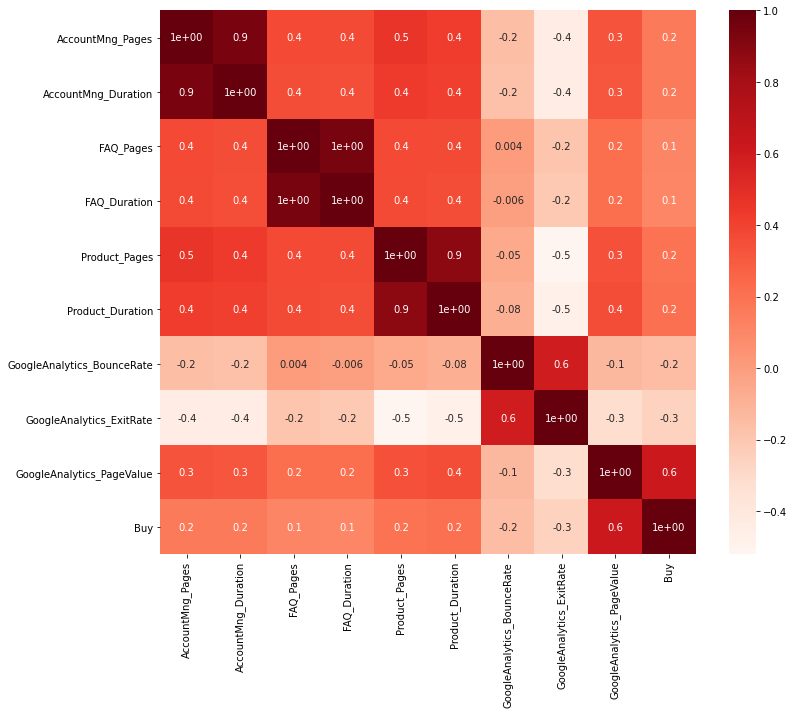

In [225]:
# Calling the function cor_heatmap() to the correlation table cor_spearman
cor_heatmap(cor_spearman)

In [226]:
cat_df = df.select_dtypes(include=['object']).copy()
cat_df

,Access_ID,Date,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor
0,102863333,21-Mar-20,MacOSX,2,Portugal,1,Returner
1,103117814,20-May-20,Windows,2,France,6,Returner
2,103201891,4-Dec-20,Windows,4,Italy,1,Returner
3,103226087,22-Dec-20,Windows,2,United Kingdom,2,Returner
4,103234445,24-Nov-20,Windows,2,Spain,3,Returner
...,...,...,...,...,...,...,...
9994,798279589,8-May-20,MacOSX,2,Brazil,14,Returner
9995,798314158,17-Jul-20,Windows,10,Spain,5,New_Access
9996,798339820,23-Mar-20,MacOSX,2,France,3,Returner
9997,798371242,16-May-20,Windows,2,Italy,3,Returner


In [227]:
cat_df.nunique()

Access_ID          9999
Date                305
OS                    8
Browser              12
Country               9
Type_of_Traffic      15
Type_of_Visitor       3
dtype: int64

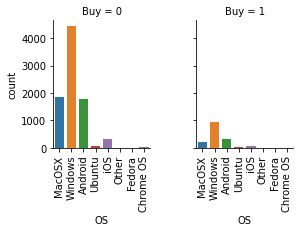

In [228]:
cat_df_and_buy = cat_df.join(df.Buy)

g = sns.catplot(x="OS", col="Buy", col_wrap=8,
                data=cat_df_and_buy[cat_df_and_buy.OS.notnull()],
                kind="count", height=2.5, aspect=.8)
g.set_xticklabels(rotation=90)
plt.show()

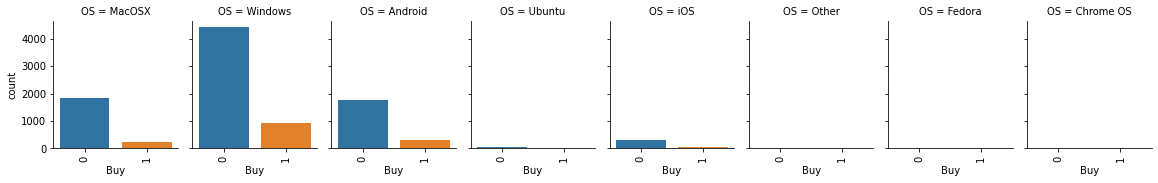

In [229]:
g = sns.catplot(x="Buy", col="OS", col_wrap=8,
                data=cat_df_and_buy[cat_df_and_buy.OS.notnull()],
                kind="count", height=2.5, aspect=.8)
g.set_xticklabels(rotation=90)
plt.show()

In [230]:
pd.value_counts(cat_df.OS, normalize = True)

Windows      0.536154
Android      0.210421
MacOSX       0.206521
iOS          0.037804
Ubuntu       0.006801
Chrome OS    0.001500
Other        0.000500
Fedora       0.000300
Name: OS, dtype: float64

In [231]:
pd.value_counts(cat_df.Country, normalize = True)

Portugal          0.387039
Spain             0.194519
Brazil            0.094709
France            0.092309
Other             0.065907
Italy             0.061306
United Kingdom    0.042904
Germany           0.035004
Switzerland       0.026303
Name: Country, dtype: float64

In [232]:
pd.value_counts(cat_df.Type_of_Visitor, normalize = True)

Returner      0.853485
New_Access    0.139114
Other         0.007401
Name: Type_of_Visitor, dtype: float64

In [233]:
def is_mobile(os):
    if os in ['Android', 'iOS']:
        return 1
    else:
        return 0


def is_apple(os):
    if os in ['iOS', 'MacOSX']:
        return 1
    else:
        return 0


def convert_date(date):
    converted = datetime.strptime(date, "%d-%b-%y")
    today = pd.to_datetime("2021-01-01")
    return (today-converted).days

In [234]:
df['is_mobile'] = df['OS'].apply(is_mobile)
df['is_apple'] = df['OS'].apply(is_apple)
df['time_not_visited'] = df['Date'].apply(convert_date)

In [235]:
df.groupby(["is_mobile","Buy"]).Buy.count()

is_mobile  Buy
0          0      6346
           1      1171
1          0      2101
           1       381
Name: Buy, dtype: int64

In [236]:
df.groupby(["is_apple","Buy"]).Buy.count()

is_apple  Buy
0         0      6286
          1      1270
1         0      2161
          1       282
Name: Buy, dtype: int64

In [237]:
df["Mng"] = df.AccountMng_Duration/df.AccountMng_Pages
df["FAQ"] = df.FAQ_Duration/df.FAQ_Pages
df["Product"] = df.Product_Duration/df.Product_Pages
df.fillna(0, inplace=True)

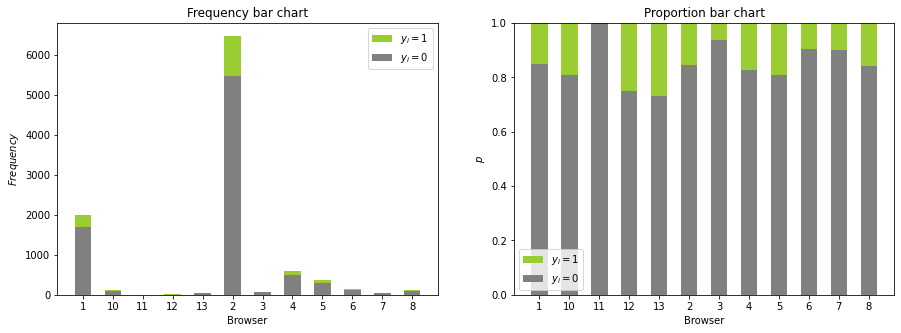

In [238]:
def bar_charts_categorical(df, feature, target):
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(15, 5))
    
    plt.subplot(121)
    p1 = plt.bar(categories, cont_tab.iloc[:-1, 0].values, 0.55, color="gray")
    p2 = plt.bar(categories, cont_tab.iloc[:-1, 1].values, 0.55, bottom=cont_tab.iloc[:-1, 0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Frequency bar chart")
    plt.xlabel(feature)
    plt.ylabel("$Frequency$")

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.ylabel("$p$")
    plt.show()
    
bar_charts_categorical(df, "Browser", "Buy")

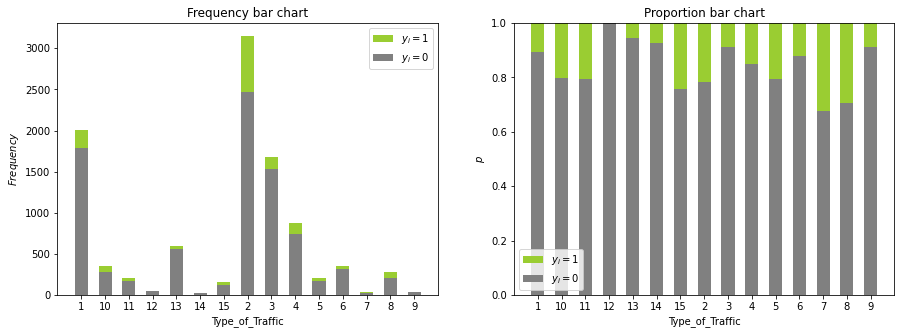

In [239]:
bar_charts_categorical(df, "Type_of_Traffic", "Buy")

In [240]:
from tqdm import tqdm_notebook as tqdm

for index, row in tqdm(df.iterrows()):
    browser = row['Browser']
    traffic = row['Type_of_Traffic']
    
    if browser=='1':
        df.at[index,'is_Browser_1'] = 1
    else:
        df.at[index,'is_Browser_1'] = 0
    if browser=='2':
        df.at[index,'is_Browser_2'] = 1
    else:
        df.at[index,'is_Browser_2'] = 0
        
    if traffic=='1':
        df.at[index,'is_Traffic_1'] = 1
    else:
        df.at[index,'is_Traffic_1'] = 0
    if traffic=='2':
        df.at[index,'is_Traffic_2'] = 1
    else:
        df.at[index,'is_Traffic_2'] = 0

<ipython-input-240-106686bff92e>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for index, row in tqdm(df.iterrows()):


0it [00:00, ?it/s]

In [241]:
df.head()

,Access_ID,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,...,is_mobile,is_apple,time_not_visited,Mng,FAQ,Product,is_Browser_1,is_Browser_2,is_Traffic_1,is_Traffic_2
0,102863333,21-Mar-20,0,0.0,0,0.0,3,64.0000,0.0000,0.0667,...,0,1,286,0.0,0.0,21.333333,0.0,1.0,1.0,0.0
1,103117814,20-May-20,0,0.0,0,0.0,23,684.5000,0.0217,0.0449,...,0,0,226,0.0,0.0,29.760870,0.0,1.0,0.0,0.0
2,103201891,4-Dec-20,0,0.0,0,0.0,8,95.0000,0.0250,0.0583,...,0,0,28,0.0,0.0,11.875000,0.0,0.0,1.0,0.0
3,103226087,22-Dec-20,0,0.0,0,0.0,9,608.7500,0.0000,0.0250,...,0,0,10,0.0,0.0,67.638889,0.0,1.0,0.0,1.0
4,103234445,24-Nov-20,0,0.0,2,386.0,36,1609.9397,0.0000,0.0093,...,0,0,38,0.0,193.0,44.720547,0.0,1.0,0.0,0.0


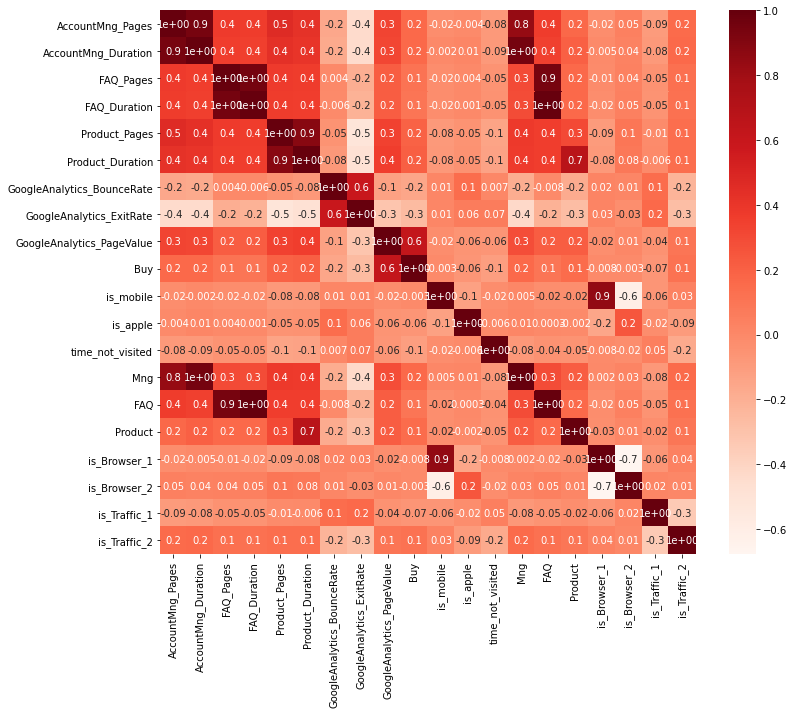

In [242]:
cor_spearman = df.corr(method ='spearman')
cor_heatmap(cor_spearman)

In [244]:
df.head()

,Access_ID,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,...,is_mobile,is_apple,time_not_visited,Mng,FAQ,Product,is_Browser_1,is_Browser_2,is_Traffic_1,is_Traffic_2
0,102863333,21-Mar-20,0,0.0,0,0.0,3,64.0000,0.0000,0.0667,...,0,1,286,0.0,0.0,21.333333,0.0,1.0,1.0,0.0
1,103117814,20-May-20,0,0.0,0,0.0,23,684.5000,0.0217,0.0449,...,0,0,226,0.0,0.0,29.760870,0.0,1.0,0.0,0.0
2,103201891,4-Dec-20,0,0.0,0,0.0,8,95.0000,0.0250,0.0583,...,0,0,28,0.0,0.0,11.875000,0.0,0.0,1.0,0.0
3,103226087,22-Dec-20,0,0.0,0,0.0,9,608.7500,0.0000,0.0250,...,0,0,10,0.0,0.0,67.638889,0.0,1.0,0.0,1.0
4,103234445,24-Nov-20,0,0.0,2,386.0,36,1609.9397,0.0000,0.0093,...,0,0,38,0.0,193.0,44.720547,0.0,1.0,0.0,0.0


In [245]:
df.drop(['Access_ID','OS','Date','Browser', 'Type_of_Traffic', 'Mng', 'FAQ', 'Product'], axis=1, inplace=True)
df.head(3)

,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,Country,Type_of_Visitor,Buy,is_mobile,is_apple,time_not_visited,is_Browser_1,is_Browser_2,is_Traffic_1,is_Traffic_2
0,0,0.0,0,0.0,3,64.0,0.0000,0.0667,0.0,Portugal,Returner,0,0,1,286,0.0,1.0,1.0,0.0
1,0,0.0,0,0.0,23,684.5,0.0217,0.0449,0.0,France,Returner,0,0,0,226,0.0,1.0,0.0,0.0
2,0,0.0,0,0.0,8,95.0,0.0250,0.0583,0.0,Italy,Returner,0,0,0,28,0.0,0.0,1.0,0.0


In [28]:
#df.to_csv("train_processed_with_browser_and_traffic.csv")

In [246]:
country_gdp_2019 = {
"Portugal": 79,         
"Spain": 91,              
"Brazil": 100,           
"France": 106,           
"Other": 100,             
"Italy": 96,            
"United Kingdom": 104,   
"Germany": 120,           
"Switzerland": 157
}

In [247]:
country_digital_2019 = {
"Portugal": 20.71,         
"Spain": 32.48,              
"Brazil": 62.03,           
"France": 52.84,           
"Other": 57.80,             
"Italy": 39.79,            
"United Kingdom": 72.77,   
"Germany": 	58.69,           
"Switzerland": 67.49
}

In [248]:
df["country_gdp_2019"] = df["Country"].apply(lambda x: country_gdp_2019[x])
df["country_digital_2019"] = df["Country"].apply(lambda x: country_digital_2019[x])
df.head(3)

,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,Country,...,Buy,is_mobile,is_apple,time_not_visited,is_Browser_1,is_Browser_2,is_Traffic_1,is_Traffic_2,country_gdp_2019,country_digital_2019
0,0,0.0,0,0.0,3,64.0,0.0000,0.0667,0.0,Portugal,...,0,0,1,286,0.0,1.0,1.0,0.0,79,20.71
1,0,0.0,0,0.0,23,684.5,0.0217,0.0449,0.0,France,...,0,0,0,226,0.0,1.0,0.0,0.0,106,52.84
2,0,0.0,0,0.0,8,95.0,0.0250,0.0583,0.0,Italy,...,0,0,0,28,0.0,0.0,1.0,0.0,96,39.79


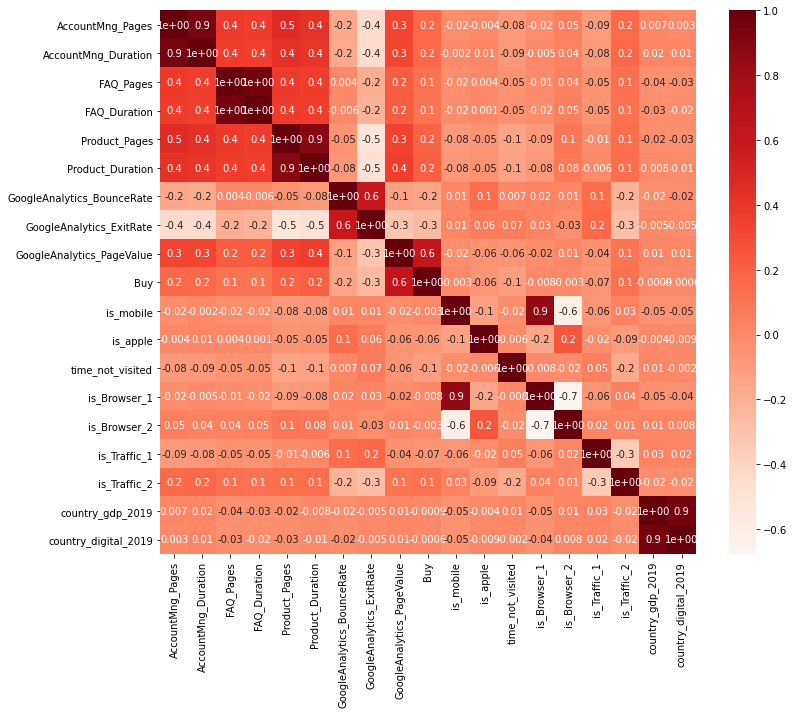

In [249]:
cor_spearman = df.corr(method ='spearman')
cor_heatmap(cor_spearman)

In [250]:
X = df.drop(["Buy", "Country", "Type_of_Visitor"], axis=1).values
y = df.Buy.values

In [251]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10, stratify=y)

In [252]:
clf = RandomForestClassifier(n_estimators=100, random_state=0, 
                             criterion = "entropy", max_leaf_nodes = 500)
clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_leaf_nodes=500, random_state=0)

In [253]:
# Predicting the Test set results
y_pred = clf.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[2446,   88],
       [ 184,  282]])

In [254]:
f1 = f1_score(y_test, y_pred)
f1

0.6746411483253588

In [255]:
####### Code FROM ANNA

# models
from sklearn.linear_model import LogisticRegression

model_log = LogisticRegression(class_weight='balanced').fit(X_train, y_train)

y_pred_train = model_log.predict(X_train)
y_pred = model_log.predict(X_test)

f1 = f1_score(y_test, y_pred)
f1

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6228622862286229

In [256]:
df.head(2)

,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,Country,...,Buy,is_mobile,is_apple,time_not_visited,is_Browser_1,is_Browser_2,is_Traffic_1,is_Traffic_2,country_gdp_2019,country_digital_2019
0,0,0.0,0,0.0,3,64.0,0.0000,0.0667,0.0,Portugal,...,0,0,1,286,0.0,1.0,1.0,0.0,79,20.71
1,0,0.0,0,0.0,23,684.5,0.0217,0.0449,0.0,France,...,0,0,0,226,0.0,1.0,0.0,0.0,106,52.84


In [257]:
df.to_csv("train_with_new.csv")

In [214]:
from numpy import mean
from numpy import std
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# configure the cross-validation procedure
cv_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
# enumerate splits
outer_results = list()
i = 0

for train_ix, test_ix in cv_outer.split(X,y):
    print(i)
    
    # split data
    X_train, X_test = X[train_ix, :], X[test_ix, :]
    y_train, y_test = y[train_ix], y[test_ix]
    # configure the cross-validation procedure
    cv_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)
    # define the model
    model = RandomForestClassifier(random_state=1)
    # define search space
    space = dict()
    space['n_estimators'] = [100, 200, 500]
    space['max_features'] = [6, 8, 10] 
    #space['criterion']=['gini','entropy'] 
    #space['max_leaf_nodes']=[50, 100, 200]
    
    # define search
    search = GridSearchCV(model, space, scoring='f1', cv=cv_inner, refit=True)
    # execute search
    result = search.fit(X_train, y_train)
    
    # get the best performing model fit on the whole training set
    best_model = result.best_estimator_
    # evaluate model on the hold out dataset
    yhat = best_model.predict(X_test)
    # evaluate the model
    f1 = f1_score(y_test, yhat)
    # store the result
    outer_results.append(f1)
    # report progress
    print('>f1=%.3f, est=%.3f, cfg=%s' % (f1, result.best_score_, result.best_params_))
    
    i = i+1

# summarize the estimated performance of the model
print('F1: %.3f (%.3f)' % (mean(outer_results), std(outer_results)))

0
>f1=0.662, est=0.655, cfg={'max_features': 8, 'n_estimators': 500}
1
>f1=0.690, est=0.645, cfg={'max_features': 10, 'n_estimators': 500}
2
>f1=0.674, est=0.650, cfg={'max_features': 8, 'n_estimators': 500}
3
>f1=0.688, est=0.640, cfg={'max_features': 8, 'n_estimators': 500}
4
>f1=0.616, est=0.656, cfg={'max_features': 10, 'n_estimators': 500}
5
>f1=0.664, est=0.645, cfg={'max_features': 10, 'n_estimators': 500}
6
>f1=0.593, est=0.656, cfg={'max_features': 10, 'n_estimators': 100}
7
>f1=0.664, est=0.660, cfg={'max_features': 8, 'n_estimators': 500}
8
>f1=0.613, est=0.652, cfg={'max_features': 8, 'n_estimators': 500}
9
>f1=0.632, est=0.648, cfg={'max_features': 6, 'n_estimators': 200}
F1: 0.650 (0.032)


In [ ]:
# configure the cross-validation procedure
cv_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
# enumerate splits
outer_results = list()
i = 0

for train_ix, test_ix in cv_outer.split(X,y):
    print(i)
    
    # split data
    X_train, X_test = X[train_ix, :], X[test_ix, :]
    y_train, y_test = y[train_ix], y[test_ix]
    # configure the cross-validation procedure
    cv_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)
    # define the model
    model = RandomForestClassifier(random_state=1, criterion='entropy')
    # define search space
    space = dict()
    space['n_estimators'] = [100, 200, 500]
    space['max_features'] = [6, 8, 10] 
    #space['criterion']=['gini','entropy'] 
    #space['max_leaf_nodes']=[50, 100, 200]
    
    # define search
    search = GridSearchCV(model, space, scoring='f1', cv=cv_inner, refit=True)
    # execute search
    result = search.fit(X_train, y_train)
    
    # get the best performing model fit on the whole training set
    best_model = result.best_estimator_
    # evaluate model on the hold out dataset
    yhat = best_model.predict(X_test)
    # evaluate the model
    f1 = f1_score(y_test, yhat)
    # store the result
    outer_results.append(f1)
    # report progress
    print('>f1=%.3f, est=%.3f, cfg=%s' % (f1, result.best_score_, result.best_params_))
    
    i = i+1

# summarize the estimated performance of the model
print('\nF1: %.3f (%.3f)' % (mean(outer_results), std(outer_results)))

In [ ]:
model = RandomForestClassifier(random_state=1, criterion='entropy', n_estimators = 500, max_features = 8)
model.fit(X, y)

In [99]:
df_test = pd.read_csv('test.csv')
df_test.head()

,Access_ID,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor
0,798519314,24-Aug-20,0,0.00,0,0.0,86,5332.5478,0.0139,0.0654,0.0000,Windows,2,Brazil,1,Returner
1,798663101,25-May-20,2,37.50,0,0.0,55,1420.4725,0.0012,0.0058,0.0000,Android,1,Spain,4,Returner
2,798663221,2-Nov-20,0,0.00,0,0.0,36,788.5000,0.0000,0.0250,0.0000,Windows,6,Spain,3,Returner
3,798760918,14-May-20,0,0.00,0,0.0,2,689.0000,0.0000,0.1000,0.0000,Windows,2,Spain,2,New_Access
4,798856982,5-Nov-20,12,225.25,1,0.0,129,3367.0413,0.0014,0.0185,1.0353,Windows,4,Portugal,10,Returner


In [100]:
df_test.Access_ID = df_test.Access_ID.astype(str)
df_test.Browser = df_test.Browser.astype(str)
df_test.Type_of_Traffic = df_test.Type_of_Traffic.astype(str)

df_test['is_mobile'] = df_test['OS'].apply(is_mobile)
df_test['is_apple'] = df_test['OS'].apply(is_apple)
df_test['time_not_visited'] = df_test['Date'].apply(convert_date)

def process(df):
    for index, row in tqdm(df.iterrows()):
        browser = row['Browser']
        traffic = row['Type_of_Traffic']

        if browser=='1':
            df.at[index,'is_Browser_1'] = 1
        else:
            df.at[index,'is_Browser_1'] = 0
        if browser=='2':
            df.at[index,'is_Browser_2'] = 1
        else:
            df.at[index,'is_Browser_2'] = 0

        if traffic=='1':
            df.at[index,'is_Traffic_1'] = 1
        else:
            df.at[index,'is_Traffic_1'] = 0
        if traffic=='2':
            df.at[index,'is_Traffic_2'] = 1
        else:
            df.at[index,'is_Traffic_2'] = 0
    return df

df_test = process(df_test)
df_test.head()

<ipython-input-100-7f688edc607a>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for index, row in tqdm(df.iterrows()):


0it [00:00, ?it/s]

,Access_ID,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,...,Country,Type_of_Traffic,Type_of_Visitor,is_mobile,is_apple,time_not_visited,is_Browser_1,is_Browser_2,is_Traffic_1,is_Traffic_2
0,798519314,24-Aug-20,0,0.00,0,0.0,86,5332.5478,0.0139,0.0654,...,Brazil,1,Returner,0,0,130,0.0,1.0,1.0,0.0
1,798663101,25-May-20,2,37.50,0,0.0,55,1420.4725,0.0012,0.0058,...,Spain,4,Returner,1,0,221,1.0,0.0,0.0,0.0
2,798663221,2-Nov-20,0,0.00,0,0.0,36,788.5000,0.0000,0.0250,...,Spain,3,Returner,0,0,60,0.0,0.0,0.0,0.0
3,798760918,14-May-20,0,0.00,0,0.0,2,689.0000,0.0000,0.1000,...,Spain,2,New_Access,0,0,232,0.0,1.0,0.0,1.0
4,798856982,5-Nov-20,12,225.25,1,0.0,129,3367.0413,0.0014,0.0185,...,Portugal,10,Returner,0,0,57,0.0,0.0,0.0,0.0


In [103]:
df_test.drop(['Access_ID','OS','Date','Browser', 'Type_of_Traffic',
             "Country", "Type_of_Visitor"], axis=1, inplace=True)
df_test.head(3)

,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,is_mobile,is_apple,time_not_visited,is_Browser_1,is_Browser_2,is_Traffic_1,is_Traffic_2
0,0,0.0,0,0.0,86,5332.5478,0.0139,0.0654,0.0,0,0,130,0.0,1.0,1.0,0.0
1,2,37.5,0,0.0,55,1420.4725,0.0012,0.0058,0.0,1,0,221,1.0,0.0,0.0,0.0
2,0,0.0,0,0.0,36,788.5000,0.0000,0.0250,0.0,0,0,60,0.0,0.0,0.0,0.0


In [106]:
X_test = df_test.values

In [107]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])